In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize']= (10,7)
plt.rcParams['figure.facecolor']= '#FFE5B4'

In [3]:
data = pd.read_csv('World Happiness Report 2022.csv')

In [4]:
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [5]:
data_columns=['Country','Happiness score','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']

In [11]:
data = data[data_columns].copy()

In [12]:
#not working
happy_df = data.rename(columns ={'Country':'country_name','Happiness score':'happiness_score','Explained by: GDP per capita':'gdp_per_capita','Explained by: Social support':'social_support','Explained by: Healthy life expectancy':'health_life_expectancy','Explained by: Freedom to make life choices':'freedom_to_make_life_choices','Explained by: Generosity':'generosity','Explained by: Perceptions of corruption':'perceptions_of_corruption'})
 

In [13]:
happy_df.head(10)

,country_name,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
5,Luxembourg*,7.404,2.209,1.155,0.790,0.700,0.120,0.388
6,Sweden,7.384,1.920,1.204,0.803,0.724,0.218,0.512
7,Norway,7.365,1.997,1.239,0.786,0.728,0.217,0.474
8,Israel,7.364,1.826,1.221,0.818,0.568,0.155,0.143
9,New Zealand,7.200,1.852,1.235,0.752,0.680,0.245,0.483


In [14]:
happy_df.isnull().sum()
#check all null values

country_name                    0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
health_life_expectancy          0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'Explained by: GDP per capita')

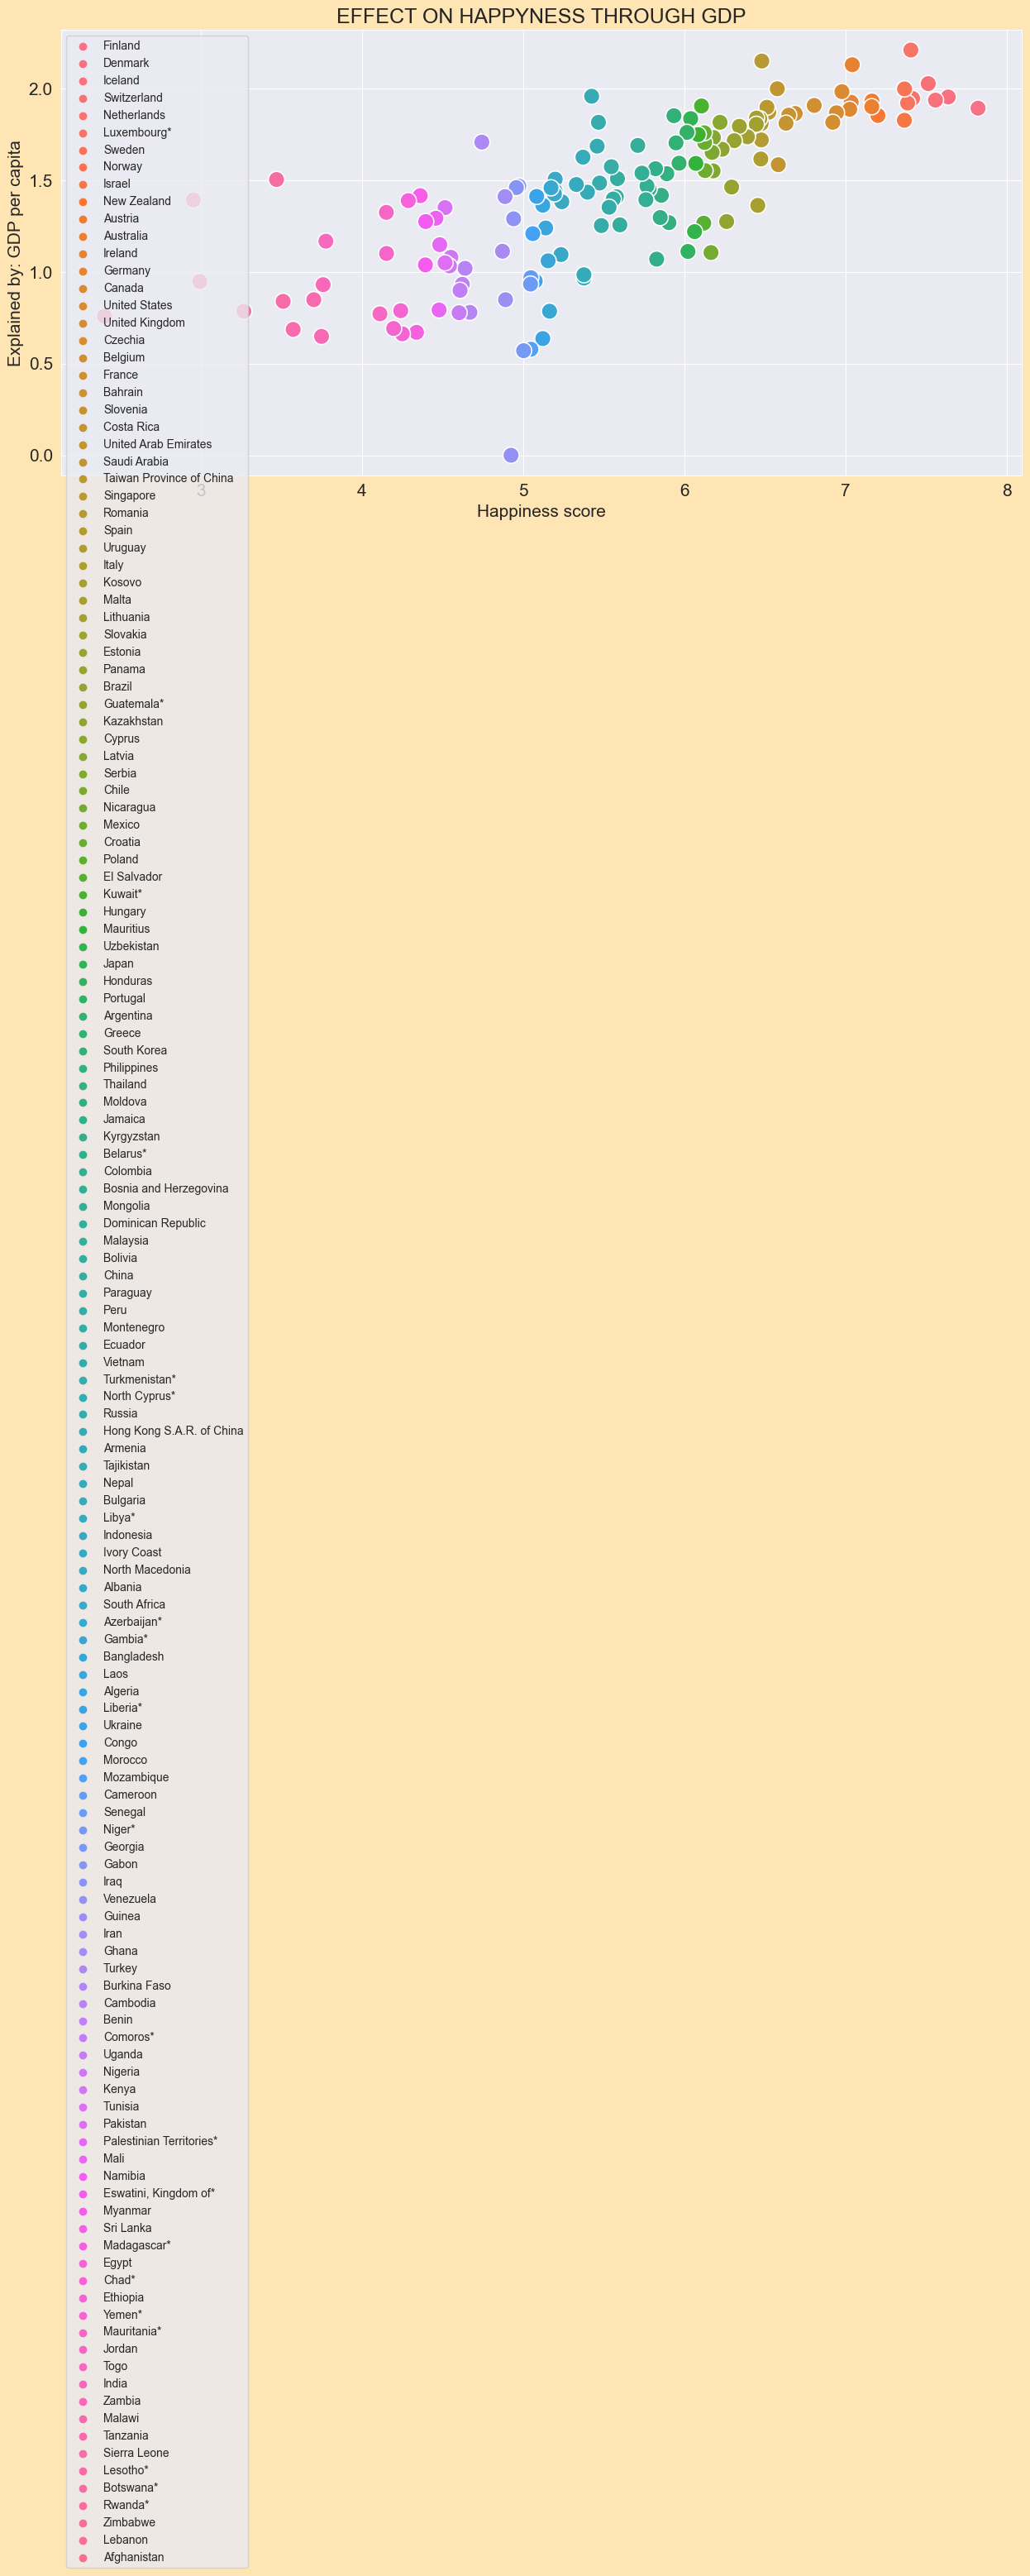

In [15]:
#plot between happyness in relation with gdp 

plt.rcParams['figure.figsize'] =(15,7)
plt.title(' EFFECT ON HAPPYNESS THROUGH GDP ')
sns.scatterplot(x = happy_df.happiness_score , y =  happy_df.gdp_per_capita, hue = happy_df.country_name , s = 200);

plt.legend(loc = 'upper left' ,fontsize ='10')
plt.xlabel('Happiness score')
plt.ylabel('Explained by: GDP per capita')

In [16]:
gdp_region = happy_df.groupby('country_name')['gdp_per_capita'].sum()
gdp_region


country_name
Afghanistan    0.758
Albania        1.439
Algeria        1.363
Argentina      1.592
Armenia        1.434
               ...  
Venezuela      0.000
Vietnam        1.252
Yemen*         0.691
Zambia         0.930
Zimbabwe       0.947
Name: gdp_per_capita, Length: 146, dtype: float64

Text(0, 0.5, 'GDP country')

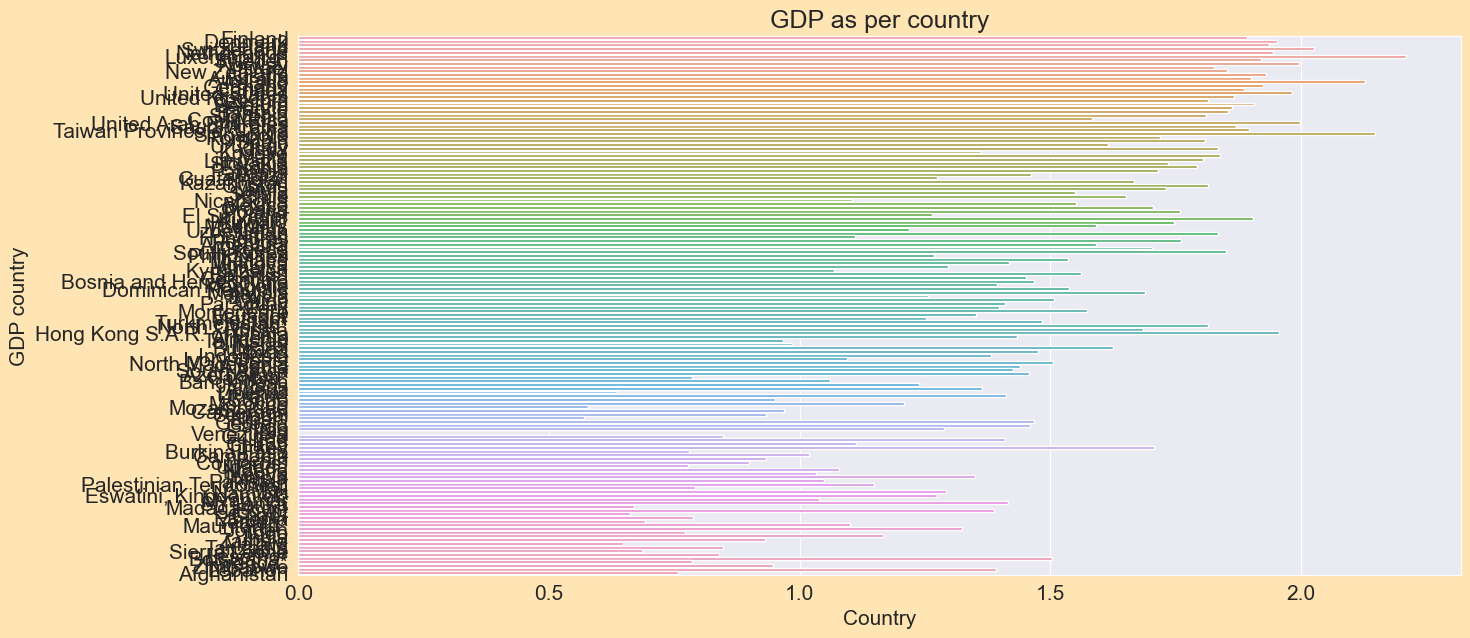

In [17]:
plt.title('GDP as per country')
sns.color_palette('rocket',as_cmap =True)
sns.barplot(y = 'country_name',x = 'gdp_per_capita', data = happy_df)
plt.xlabel('Country')
plt.ylabel('GDP country')

C:\Users\suhail shakeel\AppData\Local\Temp\ipykernel_5084\1449368122.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),


<AxesSubplot:>

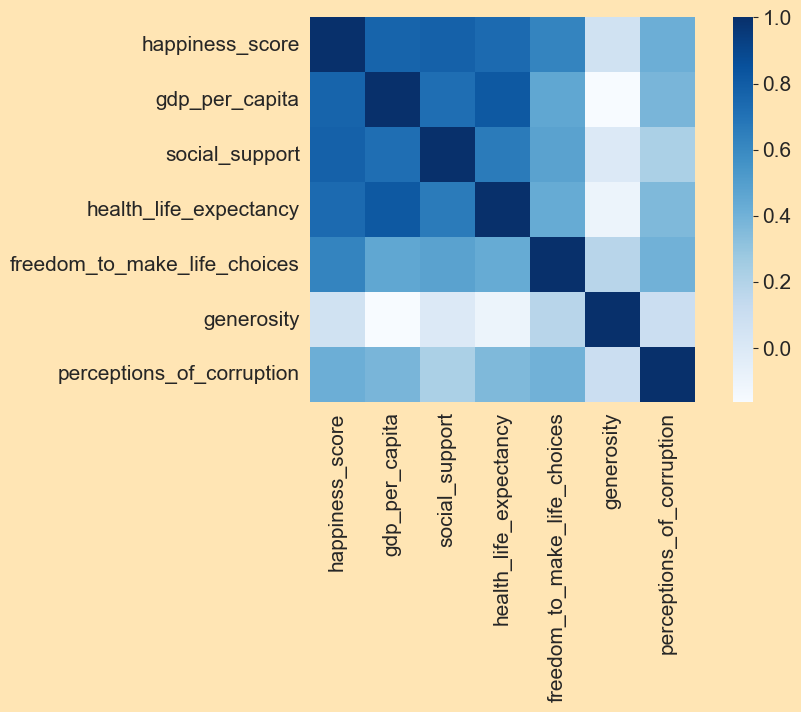

In [18]:
cor = happy_df.corr(method = 'pearson')
f, ax= plt.subplots(figsize =(10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),
           cmap ='Blues', square=True, ax=ax)

In [26]:
corruption = happy_df.groupby('country_name')[['perceptions_of_corruption']].mean()
print("Most corrupted country ")

print (corruption.iloc[-1])

print('less corrupted countries')
corruption.head()

Most corrupted country 
perceptions_of_corruption    0.105
Name: Zimbabwe, dtype: float64
less corrupted countries


,perceptions_of_corruption
country_name,
Afghanistan,0.005
Albania,0.028
Algeria,0.150
Argentina,0.085
Armenia,0.210


<BarContainer object of 146 artists>

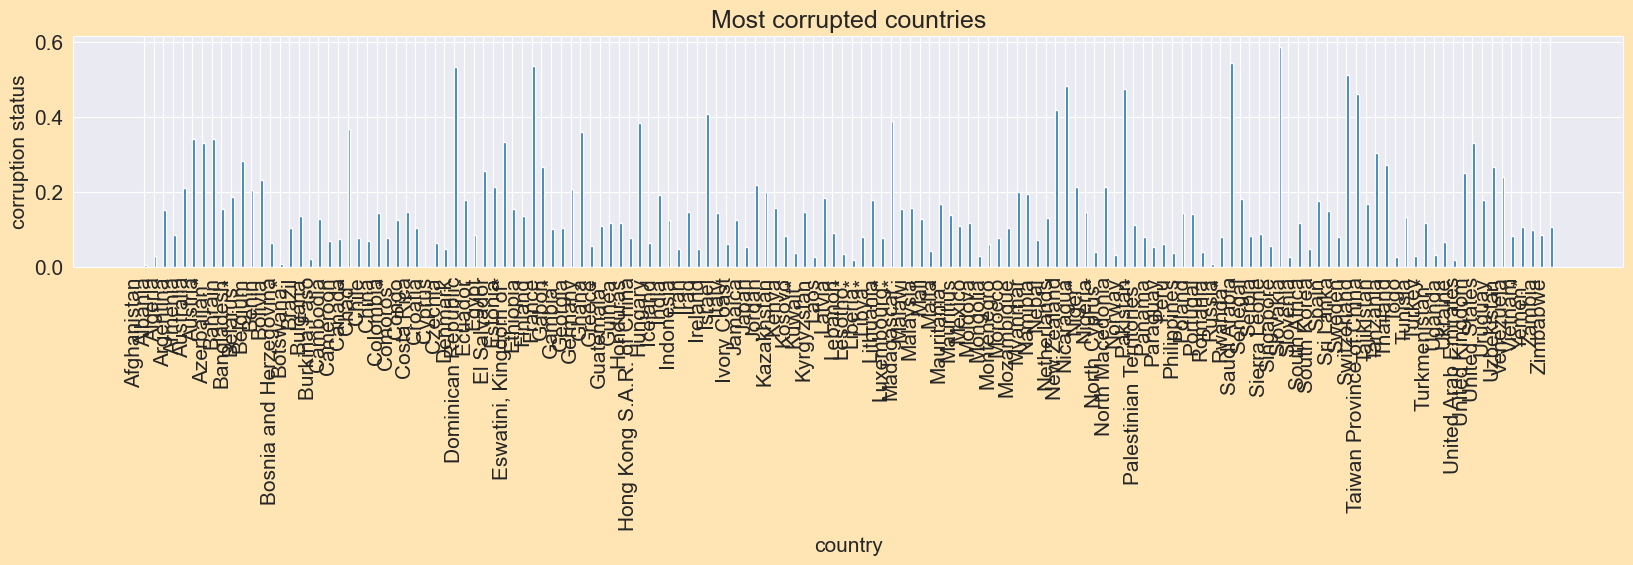

In [31]:
plt.rcParams['figure.figsize']= (20,3)
plt.title("Most corrupted countries")
plt.xlabel('country',fontsize = 15)
plt.ylabel('corruption status',fontsize = 15)
plt.xticks(rotation = 90, ha = 'right')
plt.bar(corruption.index,corruption.perceptions_of_corruption,align ='edge',width = 0.3)

In [33]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\suhail shakeel\AppData\Local\Temp\ipykernel_5084\81177057.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')
C:\Users\suhail shakeel\AppData\Local\Temp\ipykernel_5084\81177057.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')


Text(155.47222222222223, 0.5, 'Life expectancy')

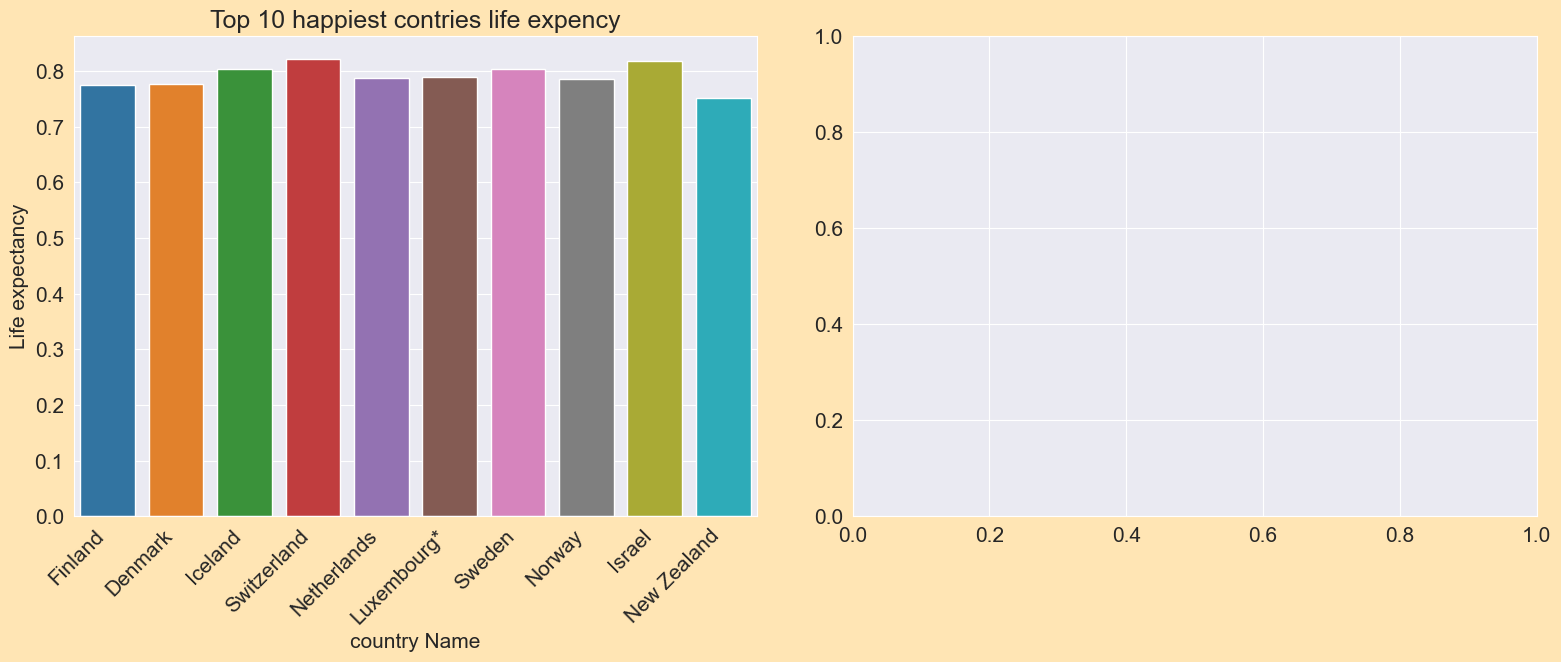

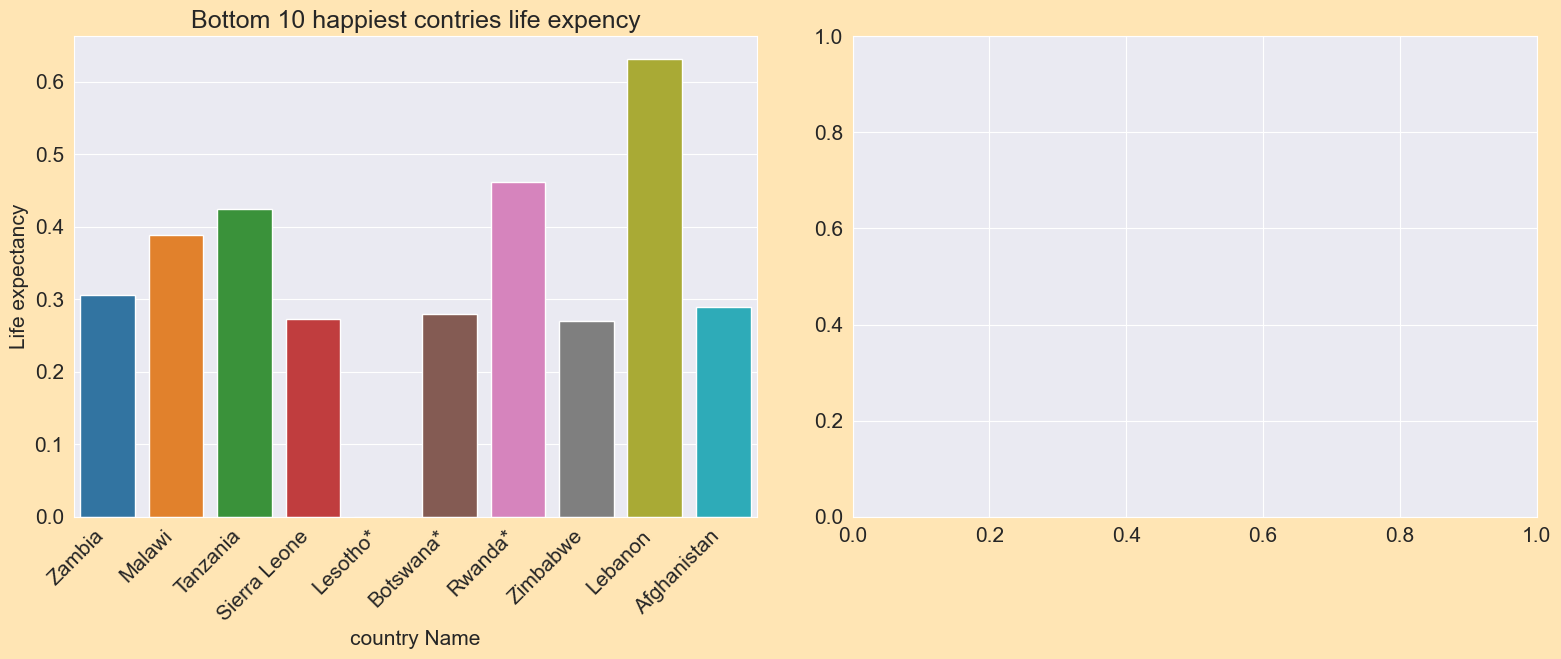

In [41]:
fig,axes= plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country_name
axes[0].set_title('Top 10 happiest contries life expency')
axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x=top_10.country_name,y=top_10.health_life_expectancy, ax = axes[0])
axes[0].set_xlabel('country Name')
axes[0].set_ylabel('Life expectancy')

fig,axes= plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=bottom_10.country_name
axes[0].set_title('Bottom 10 happiest contries life expency')
axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x=bottom_10.country_name,y=bottom_10.health_life_expectancy, ax = axes[0])
axes[0].set_xlabel('country Name')
axes[0].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness score')

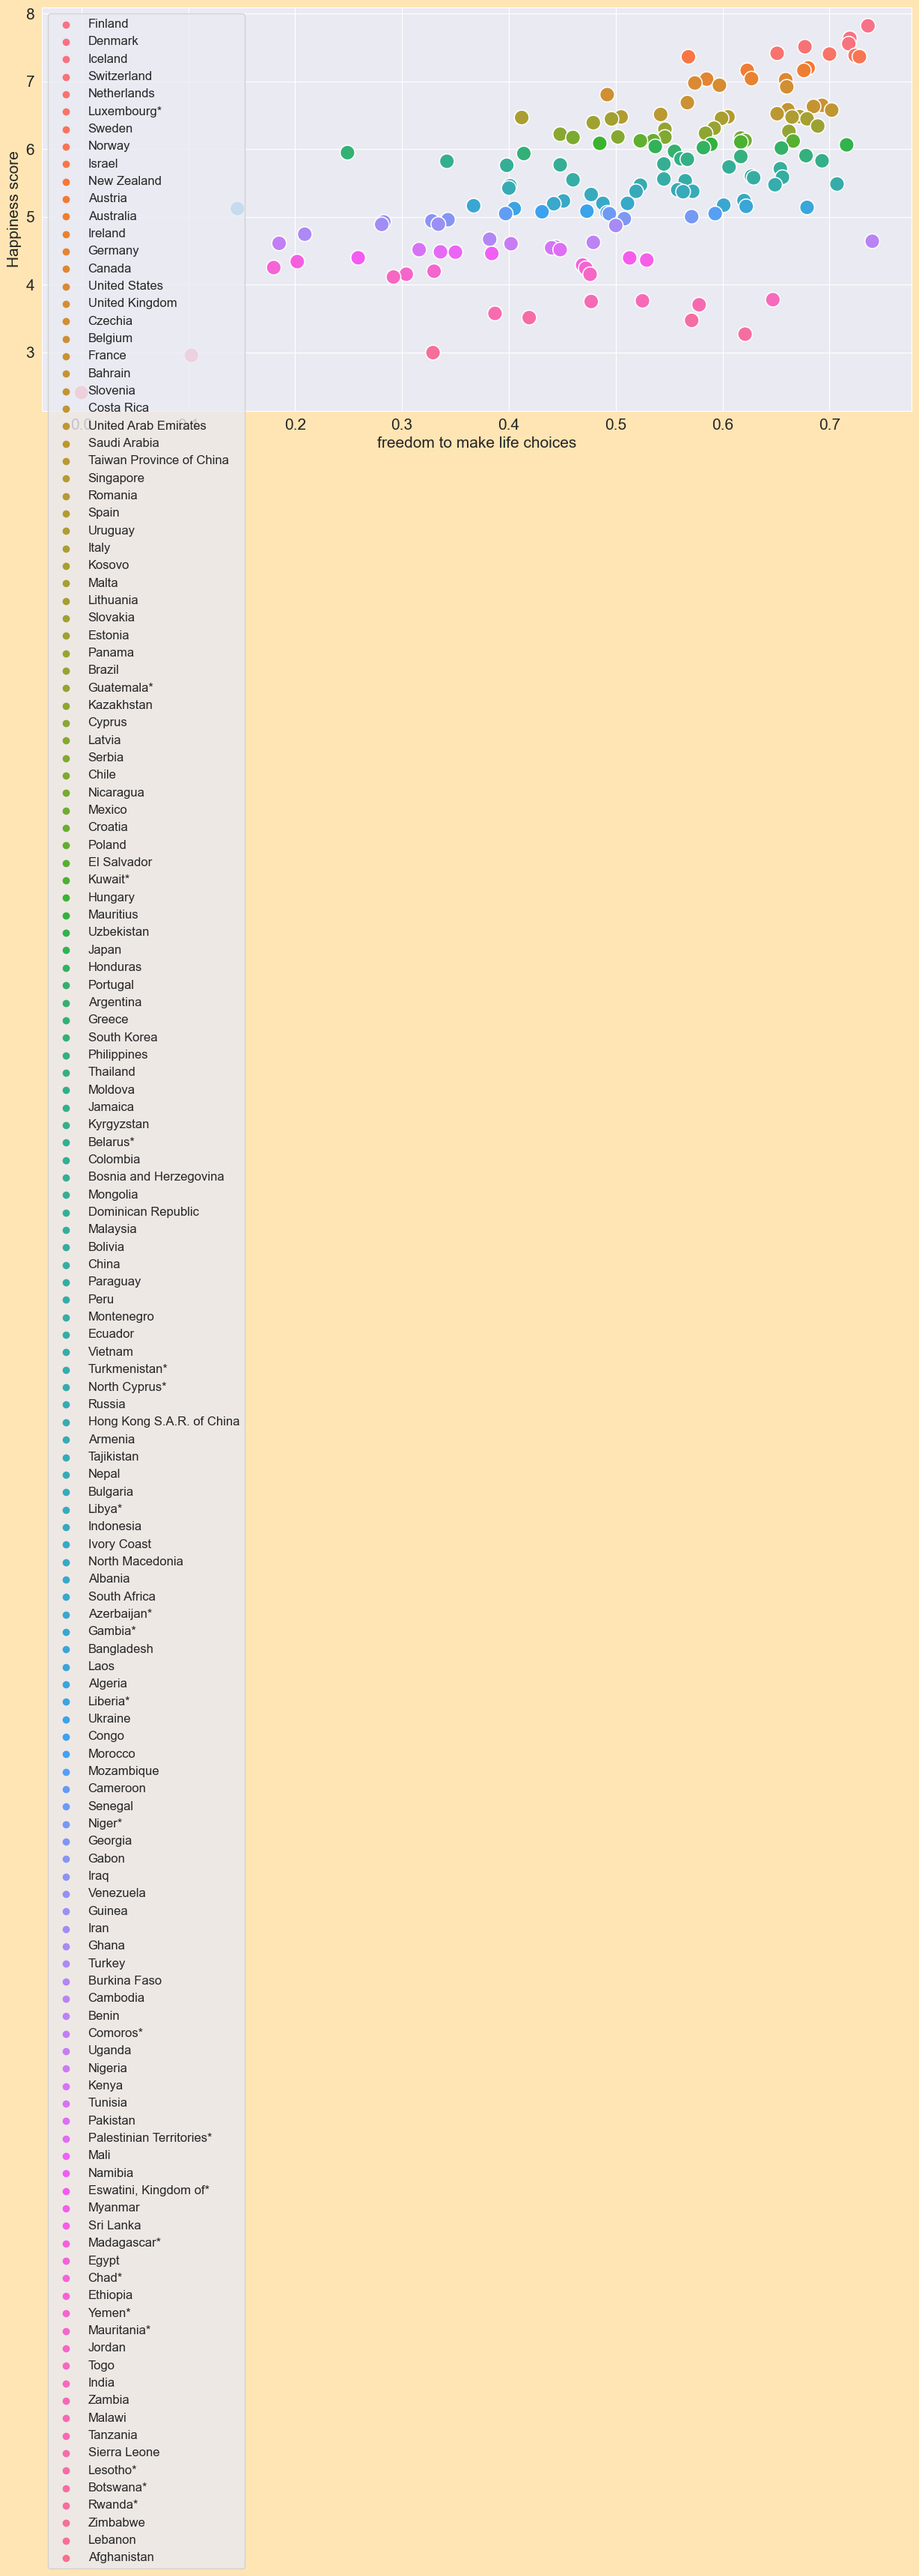

In [45]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x= happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score, hue= happy_df.country_name,s= 200)
plt.legend(loc = 'upper left',fontsize = '12')
plt.xlabel('freedom to make life choices')
plt.ylabel('Happiness score')

<BarContainer object of 10 artists>

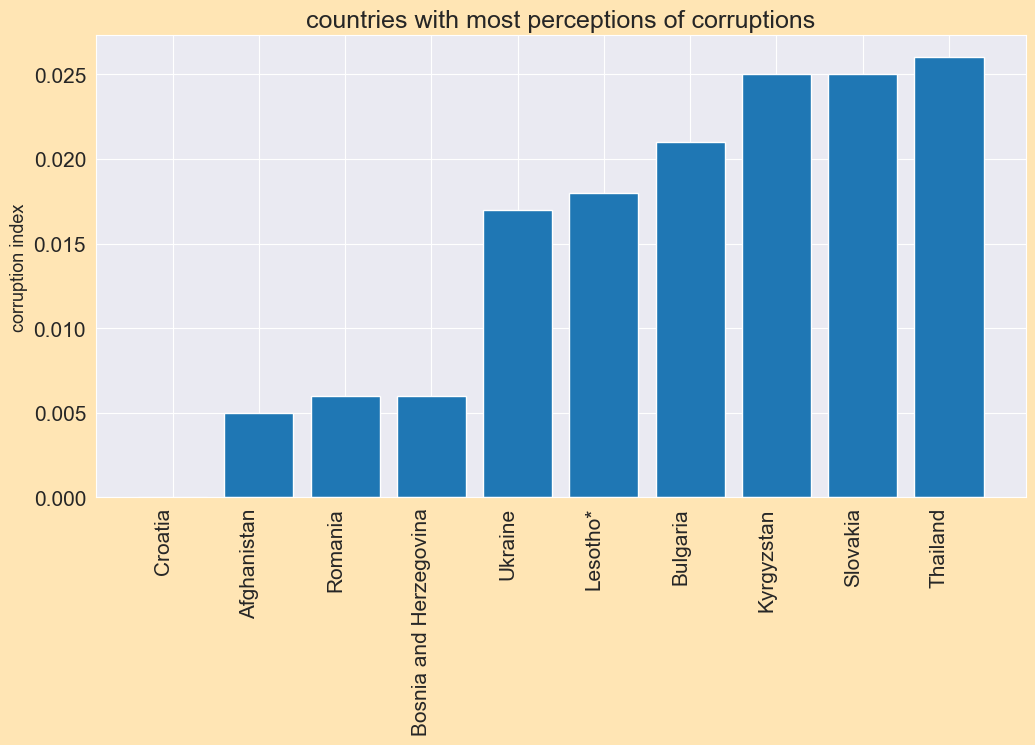

In [48]:
country =happy_df.sort_values(by= 'perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('countries with most perceptions of corruptions')
plt.ylabel('country',fontsize = 13)
plt.ylabel('corruption index',fontsize = 13)
plt.xticks(rotation = 90, ha = 'right')
plt.bar(country.country_name,country.perceptions_of_corruption)

Text(0.5, 0, 'Happyness score')

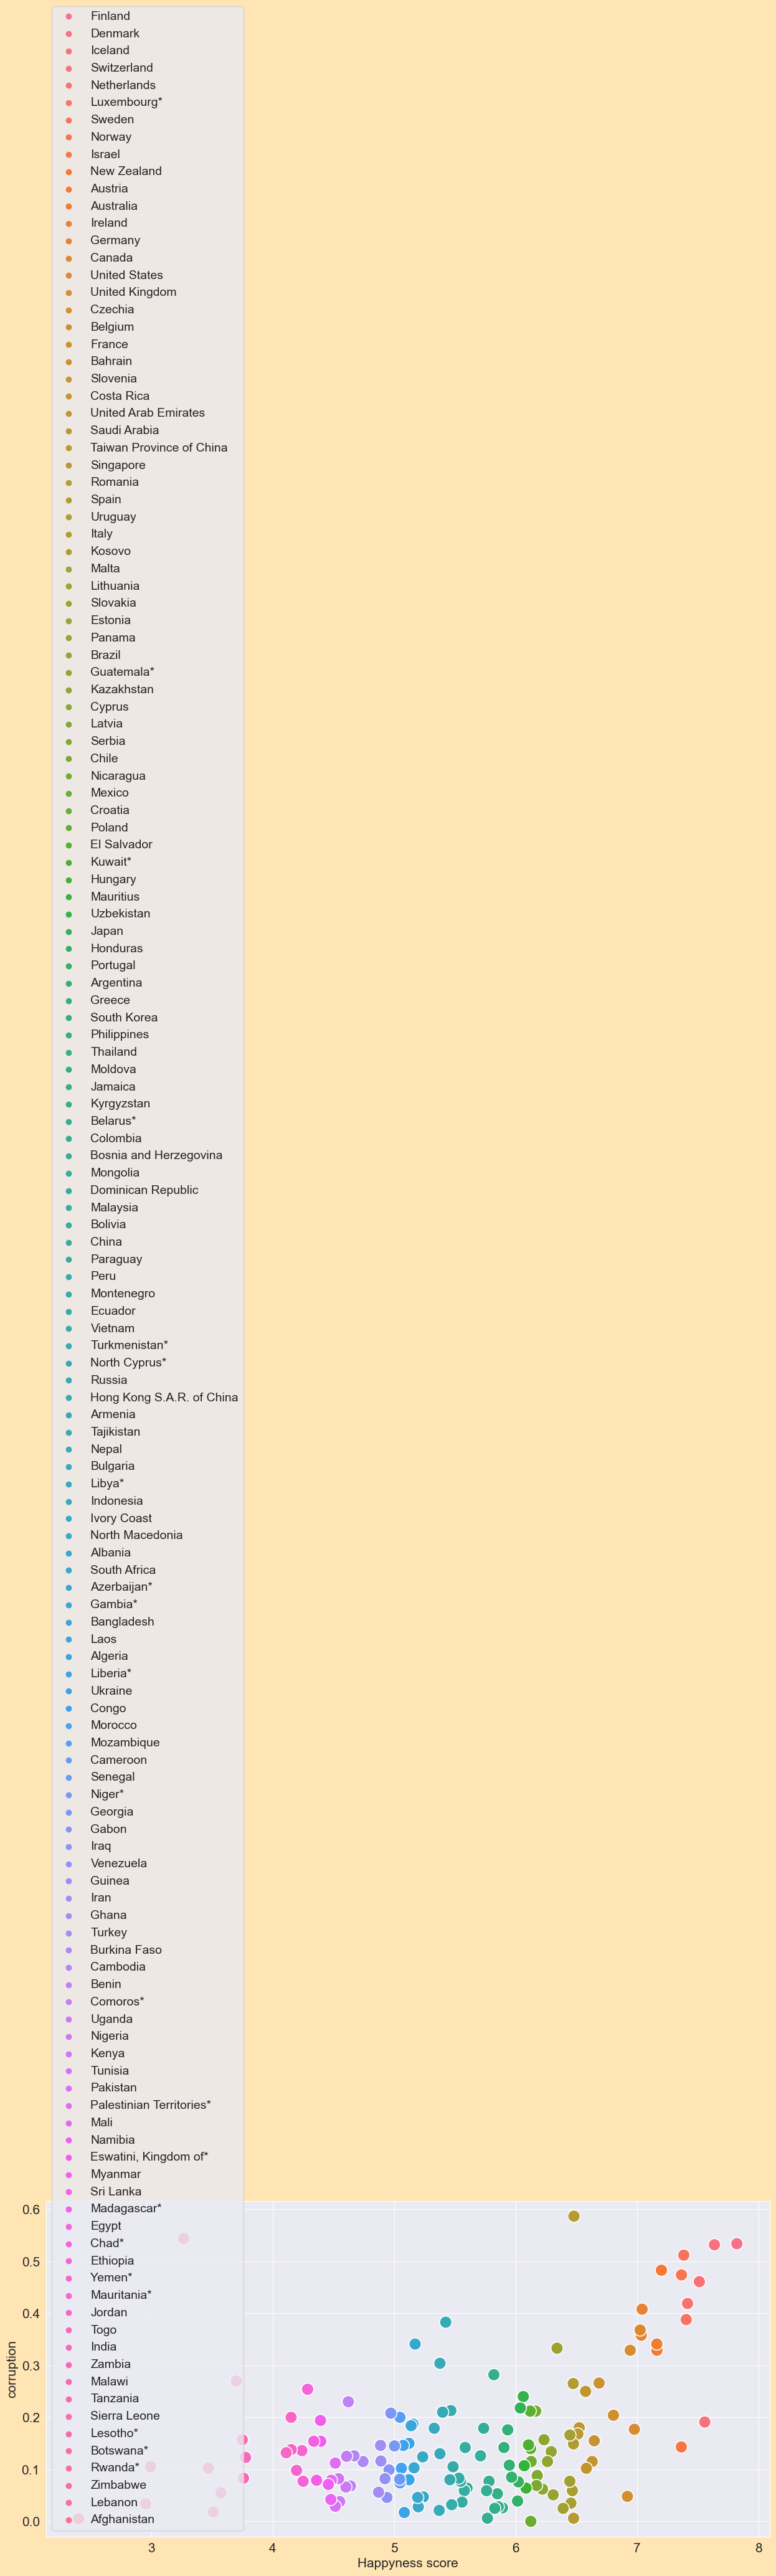

In [51]:
# how corruption varries with happyness 
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df.happiness_score,y=happy_df.perceptions_of_corruption,hue=happy_df.country_name, s= 200)
plt.legend(loc='lower left', fontsize = '14')
plt.ylabel('corruption')
plt.xlabel('Happyness score')
